In [64]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [65]:
dataframe = pd.read_csv("BIKE DETAILS.csv")

In [66]:
df = dataframe

In [67]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [69]:
df.shape


(1061, 7)

In [70]:
df.dtypes

name                  object
selling_price          int64
year                   int64
seller_type           object
owner                 object
km_driven              int64
ex_showroom_price    float64
dtype: object

In [71]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


df.duplicated()

In [72]:
df.duplicated().sum()

np.int64(6)

In [73]:
df.drop_duplicates().reset_index(drop = True)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1050,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1051,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1052,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1053,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [74]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [75]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

#### df.ex_showroom_price.unique()

# This null values, we'll be handling at later stage when, will get to understand SLR and MLR.

In [76]:
# 1.What is the range of selling prices in the dataset?
selling_price_max = df["selling_price"].max()
selling_price_min = df["selling_price"].min()

selling_price_range = selling_price_max - selling_price_min
print("Range of selling price is: \n", selling_price_range)

Range of selling price is: 
 755000


In [77]:
# 2.What is the median selling price for bikes in the dataset?
median_of_selling_price = df['selling_price'].median()
print(f"Median selling price for bikes in the dataset is:\n{median_of_selling_price}")

Median selling price for bikes in the dataset is:
45000.0


In [78]:
# 3.What is the most common sellter type?

common_seller = df.seller_type.mode().iloc[0]
print(f"The most common sellter type in the dataset is:\n{common_seller}")

The most common sellter type in the dataset is:
Individual


In [91]:
# 4.How many bikes have driven more than 50,000 kilometers?
km_driven_more_than_fifty_thousand = (df.km_driven > 50000).sum()
print(f"{km_driven_more_than_fifty_thousand} bikers are driven more than 50,000 in the dataset.")

170 bikers are driven more than 50,000 in the dataset.


In [92]:
# 5.What is the average km_driven value for each ownership type
ownership_average_km_driven = round(df.groupby("owner")["km_driven"].mean(), 2)
print(f"Average km_values for each ownership type is:\n", ownership_average_km_driven)



Average km_values for each ownership type is:
 owner
1st owner     32816.58
2nd owner     39288.99
3rd owner     33292.18
4th owner    311500.00
Name: km_driven, dtype: float64


In [81]:
# 6.What proportion of bikes are from the year 2015 or older
proportion_of_2015_or_earlier = round((df.year <= 2015).mean()*100, 2)
print("What proportion of bikes are from the year 2015 or older")
print(f"{proportion_of_2015_or_earlier}% of the bikes are from 2015 or older")

What proportion of bikes are from the year 2015 or older
56.64% of the bikes are from 2015 or older


In [95]:
# 7.What is the trend of missing values across the dataset
count_missing_values = df.isnull().sum()

df_missing_values = (df.isnull().mean()) *100

# print(f"Total missing value counts in the dataset is: \n{count_missing_values}")
print()

print(f"Missing value trends across the dataset is: \n{df_missing_values}")
print("Only ex_showroom_price has 40% of missing values, reset are with no missing values")


Missing value trends across the dataset is: 
name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64
Only ex_showroom_price has 40% of missing values, reset are with no missing values


In [83]:
# 8.What is the highest ex_showroom_price recorded and for which bike?
max_ex_showroom_price = df.ex_showroom_price.max()
name_of_bike_with_highest_ex_showroom = df[df['ex_showroom_price'] == max_ex_showroom_price]['name'].iloc[0]
print(f"Highest Ex_showroom price was {round(max_ex_showroom_price)} lakhs and the bike name was {name_of_bike_with_highest_ex_showroom}")

Highest Ex_showroom price was 1278000 lakhs and the bike name was Harley-Davidson Street Bob


In [98]:
# 9.What is the total number of bikes listed by each selling type?
total_bikes_by_each_seller = df.groupby("seller_type")["name"].count().to_string()
print(f"Total number of bikes listed by each seller type is:\n{total_bikes_by_each_seller}")

Total number of bikes listed by each seller type is:
seller_type
Dealer           6
Individual    1055


In [85]:
# 10.What is the relationship between selling_price and km_driven for first-owner bikes?
first_owner = df[df["owner"] == "1st owner"]
correlation = first_owner["selling_price"].corr(first_owner['km_driven'])

# Explaining the correlation
if correlation > 0:
    relationship = f"{correlation} Positive Relationship between selling_price and km_drive for First bike owner"
elif correlation < 0:
    relationship = f"{correlation} Negative Relationship Between selling_price and km_drive for First bike owner"
else:
    print(f"{correlation} No Relation between selling price and km_driven for the Bike's First owner")


print(relationship)


-0.24348174844965703 Negative Relationship Between selling_price and km_drive for First bike owner


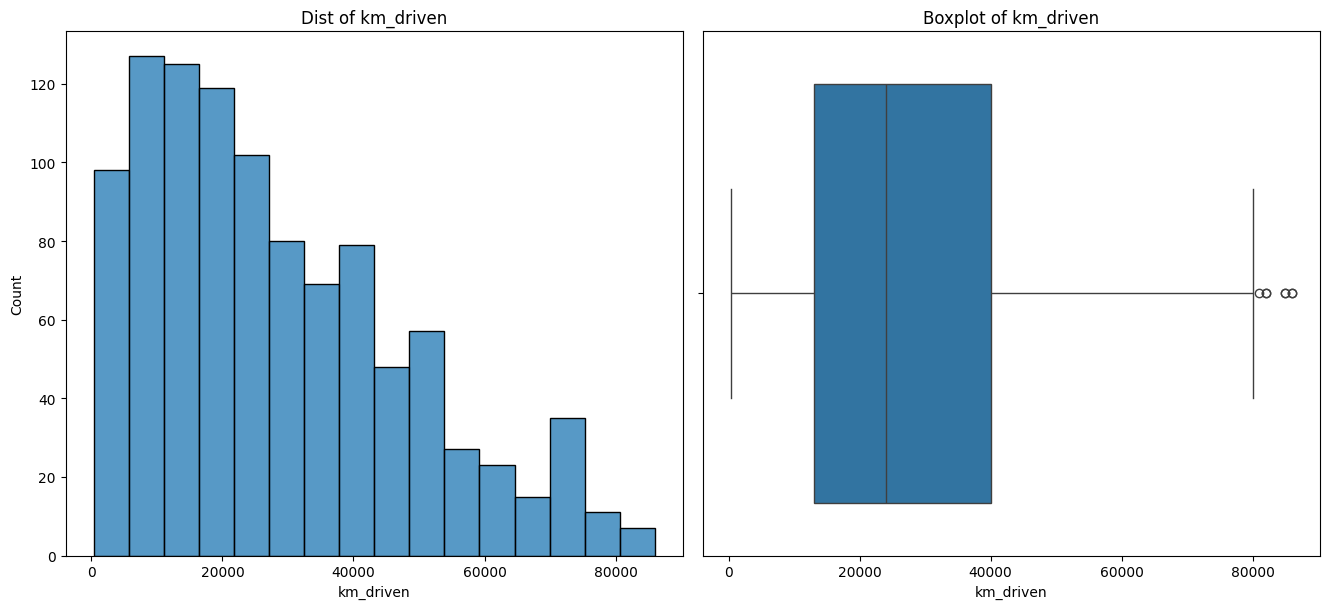

In [99]:
#11.Identify and remove outliers in the km_driven column using the IQR method

# Treating the outliers using IQR method
Q1 = df['km_driven'].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)

IQR = Q3-Q1

lower_fence = Q1 - 1.5 *IQR
upper_fence = Q3 + 1.5*IQR

# Was checking the outliers
# outliers_col2 = df['km_driven'][(df['km_driven'] < lower_fence) | (df['km_driven'] > upper_fence)]

filtered_df = df[(df.km_driven >= lower_fence) & (df.km_driven <= upper_fence)]
df = filtered_df

plt.figure(figsize= (13.4,6.2))

# Visualizing to check outliers after the treatment 
plt.subplot(1,2,1)
sns.histplot(df.km_driven)
plt.title("Dist of km_driven")

plt.subplot(1, 2, 2)
sns.boxplot(x=df.km_driven)
plt.title("Boxplot of km_driven")
plt.xlabel("km_driven")

plt.tight_layout()
plt.show()

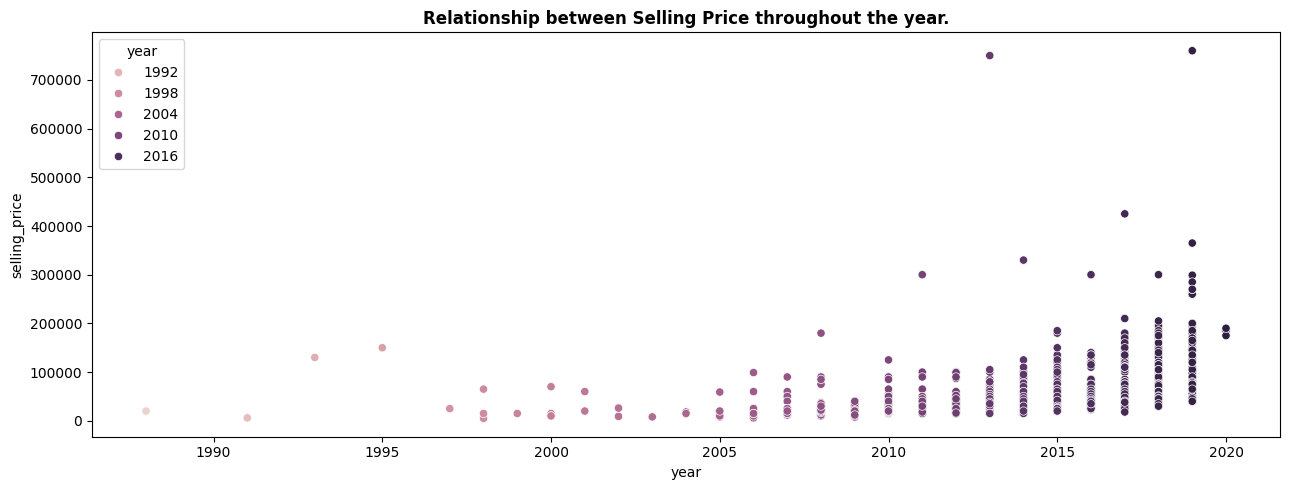

In [100]:
# 12.Perform a bivariate analysis to visualize the relationship between year and selling price.
# df.year
# df.selling_price

plt.figure(figsize=(13, 5))
sns.scatterplot(x="year", y= "selling_price", data=df, hue = "year" )
plt.title("Relationship between Selling Price throughout the year.", fontweight='bold' )

plt.tight_layout()
plt.show()

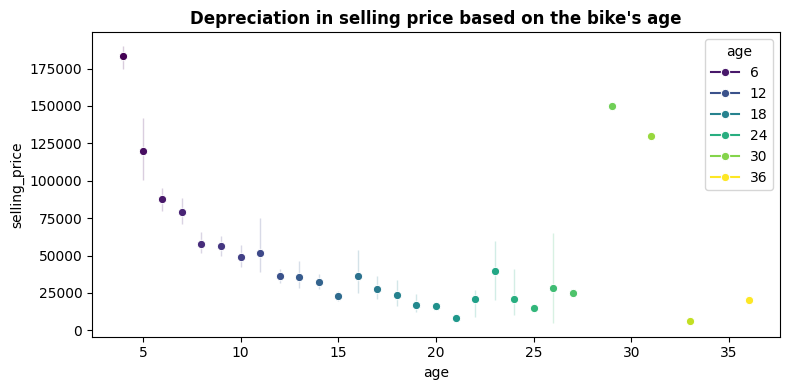

In [101]:
# 13.What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?
df['age'] = 2024 - df.year
df.groupby('age')['selling_price'].mean()

plt.figure(figsize=(8, 4))
sns.lineplot(x = "age", y= "selling_price", data=df,hue = "age",marker="o", palette="viridis" )
plt.title("Depreciation in selling price based on the bike's age", fontweight="bold")


plt.tight_layout()
plt.show()

In [ ]:
df

In [102]:
# 14.Which bike names are priced significantly above the average price for their manufacturing year?
avg_price = df.groupby('year')['selling_price'].mean()
df[df['selling_price'] > 2 * df['year'].map(avg_price)][['name', 'selling_price', 'year']]


,name,selling_price,year
7,Royal Enfield Bullet 350 [2007-2011],180000,2008
13,Yamaha YZF R3,365000,2019
37,Honda CBR-250R,120000,2016
42,KTM 390 Duke,175000,2017
52,Royal Enfield Electra 5 S,90000,2010
...,...,...,...
951,Royal Enfield Electra 5 S,90000,2012
966,Hyosung GT250R,135000,2016
967,Royal Enfield Thunder 350,125000,2015
981,Royal Enfield Thunder 350,105000,2013


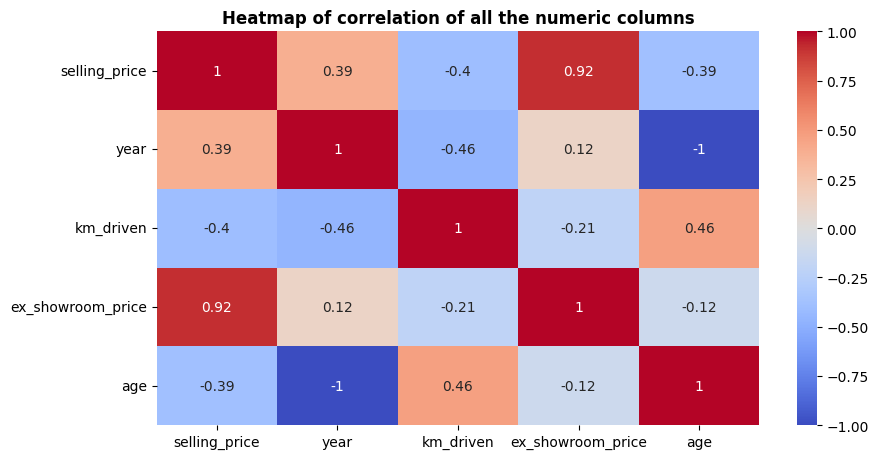

In [103]:
# 15.develop a correlation matrix for numeric columns and visualize it using a heatmap.
numeric_cols = [feature for feature in df.columns if df[feature].dtypes in ["int", "float"]]

corr = df[numeric_cols].corr()

# making the plot out of it
plt.figure(figsize = (9.3, 4.7))
sns.heatmap(corr, annot= True, cmap="coolwarm")
plt.title("Heatmap of correlation of all the numeric columns", fontweight="bold")
plt.tight_layout()
plt.show()

In [104]:
numeric_cols

['selling_price', 'year', 'km_driven', 'ex_showroom_price', 'age']

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1022 entries, 0 to 1059
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1022 non-null   object 
 1   selling_price      1022 non-null   int64  
 2   year               1022 non-null   int64  
 3   seller_type        1022 non-null   object 
 4   owner              1022 non-null   object 
 5   km_driven          1022 non-null   int64  
 6   ex_showroom_price  607 non-null    float64
 7   age                1022 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 71.9+ KB


In [ ]:

End of tht Eda
